In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b5b13abc999fd73ed07fc113ac2526ded5064d2af6e05abebd860ff1f150b3e9
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Import zone
import pandas as pd
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
%matplotlib inline

Upload data from files

In [ ]:
from google.colab import files
uploaded = files.upload() # download CSV by uploading

Saving xxx_dataset.csv to xxx_dataset.csv


In [ ]:
# Use pandas to read csv (file)
# the file is located at /content/../
df = pd.read_csv("/content/xxx_dataset.csv")

EDA tools import ProfileReport form [1]

In [ ]:
# Assign ProfileReport from ydata-profiling as profile
# where Report is take df ( pandas read from xxx_dataset.csv )
# these profile has ( data, title ) in form of html and not sorting datas
profile = ProfileReport(
    df,
    title="Pandas Profiling Report",
    html={'style':{'full_width':True}},
    sort=None
)

In [ ]:
# Run in iframe
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Data Preparation

In [ ]:
df.shape #Get Shape Length ( Struct in form of matrix ) => 2D ( row, column ) : ( 400, 11 )

(400, 11)

In [ ]:
df.columns #Get Attributes list

Index(['gender', 'age', 'hypertension', 'heart_disease', 'Marriage',
       'work_type', 'Living_type', 'avg_glucose', 'bmi', 'smoking_status',
       'illness'],
      dtype='object')

In [ ]:
df #Print

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
395,Female,54.0,0,1,Yes,Private,Urban,140.28,37.1,formerly smoked,0
396,Male,67.0,0,0,Yes,Govt_job,Rural,244.28,29.4,formerly smoked,0
397,Male,53.0,0,0,Yes,Private,Urban,124.16,31.7,never smoked,0
398,Male,47.0,0,0,Yes,Private,Rural,93.55,31.4,never smoked,0


In [ ]:
df.isnull().any() #Get Every Column and check is null

,0
gender,False
age,False
hypertension,False
heart_disease,False
Marriage,False
work_type,False
Living_type,False
avg_glucose,False
bmi,False
smoking_status,False


In [ ]:
df.nunique() #Get Every Column and check unique ( How many it has and not count the dupe )

,0
gender,2
age,79
hypertension,2
heart_disease,2
Marriage,2
work_type,4
Living_type,2
avg_glucose,393
bmi,199
smoking_status,4


In [ ]:
df.describe(include = 'all') #Display stat

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
count,400,400.00000,400.000000,400.000000,400,400,400,400.000000,400.000000,400,400.000000
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,214,NaN,NaN,NaN,306,231,201,NaN,NaN,164,NaN
mean,NaN,55.26780,0.180000,0.132500,NaN,NaN,NaN,119.391950,29.481750,NaN,0.500000
std,NaN,22.51279,0.384669,0.339458,NaN,NaN,NaN,54.377459,6.488354,NaN,0.500626
min,NaN,0.80000,0.000000,0.000000,NaN,NaN,NaN,56.070000,15.600000,NaN,0.000000
25%,NaN,44.00000,0.000000,0.000000,NaN,NaN,NaN,80.460000,25.575000,NaN,0.000000
50%,NaN,59.00000,0.000000,0.000000,NaN,NaN,NaN,97.665000,28.600000,NaN,0.500000
75%,NaN,74.25000,0.000000,0.000000,NaN,NaN,NaN,144.345000,33.025000,NaN,1.000000


In [ ]:
# Assign Formatting by keyword across map function ( enumerate )
df[ 'gender' ] = df[ 'gender' ].map({ 'Female': 1, 'Male': 0})
df[ 'Marriage' ] = df[ 'Marriage' ].map({ 'Yes': 1, 'No': 0})
df[ 'work_type' ] = df[ 'work_type' ].map({ 'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3})
df[ 'Living_type' ] = df[ 'Living_type' ].map({ 'Urban': 1, 'Rural': 0})
df[ 'smoking_status' ] = df[ 'smoking_status' ].map({ 'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})

In [ ]:
df # Print

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status,illness
0,0,67.0,0,1,1,0,1,228.69,36.6,0,1
1,0,80.0,0,1,1,0,0,105.92,32.5,1,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,1,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,54.0,0,1,1,0,1,140.28,37.1,0,0
396,0,67.0,0,0,1,2,0,244.28,29.4,0,0
397,0,53.0,0,0,1,0,1,124.16,31.7,1,0
398,0,47.0,0,0,1,0,0,93.55,31.4,1,0


In [ ]:
y = df[ 'illness' ] # Assign align y
x = df.drop(columns=[ 'illness' ]) # Assign all columns without illness

In [ ]:
x.head() # Print top of table

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0,67.0,0,1,1,0,1,228.69,36.6,0
1,0,80.0,0,1,1,0,0,105.92,32.5,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2
3,1,79.0,1,0,1,1,0,174.12,24.0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,0


In [ ]:
y.value_counts() # Return a Series containing counts of unique values.

,count
illness,
1,200
0,200


In [ ]:
from sklearn. preprocessing import MinMaxScaler # Import scaler

scaler = MinMaxScaler() # Scale Feature in-range
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns) # Fit to data, then transform it.
x_scaled # Print

,gender,age,hypertension,heart_disease,Marriage,work_type,Living_type,avg_glucose,bmi,smoking_status
0,0.0,0.815271,0.0,1.0,1.0,0.000000,1.0,0.800389,0.630631,0.000000
1,0.0,0.975369,0.0,1.0,1.0,0.000000,0.0,0.231140,0.507508,0.333333
2,1.0,0.593596,0.0,0.0,1.0,0.000000,1.0,0.533964,0.564565,0.666667
3,1.0,0.963054,1.0,0.0,1.0,0.333333,0.0,0.547364,0.252252,0.333333
4,0.0,0.987685,0.0,0.0,1.0,0.000000,1.0,0.603422,0.402402,0.000000
...,...,...,...,...,...,...,...,...,...,...
395,1.0,0.655172,0.0,1.0,1.0,0.000000,1.0,0.390458,0.645646,0.000000
396,0.0,0.815271,0.0,0.0,1.0,0.666667,0.0,0.872676,0.414414,0.000000
397,0.0,0.642857,0.0,0.0,1.0,0.000000,1.0,0.315714,0.483483,0.333333
398,0.0,0.568966,0.0,0.0,1.0,0.000000,0.0,0.173784,0.474474,0.333333


In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.7) # Split arrays or matrices into random train and test subsets

In [ ]:
x_train, x_test, y_train, y_test

(     gender       age  hypertension  heart_disease  Marriage  work_type  \
 120     1.0  0.876847           1.0            0.0       1.0   0.000000   
 97      0.0  0.901478           0.0            0.0       1.0   0.000000   
 181     0.0  0.987685           1.0            1.0       1.0   0.000000   
 212     1.0  0.310345           0.0            0.0       0.0   0.000000   
 326     0.0  0.876847           0.0            1.0       1.0   0.333333   
 ..      ...       ...           ...            ...       ...        ...   
 266     1.0  0.051724           0.0            0.0       0.0   1.000000   
 349     1.0  0.519704           0.0            0.0       1.0   0.333333   
 250     0.0  0.088670           0.0            0.0       0.0   1.000000   
 389     0.0  0.211823           0.0            0.0       0.0   0.000000   
 15      1.0  0.729064           0.0            0.0       0.0   0.000000   
 
      Living_type  avg_glucose       bmi  smoking_status  
 120          1.0     0.768

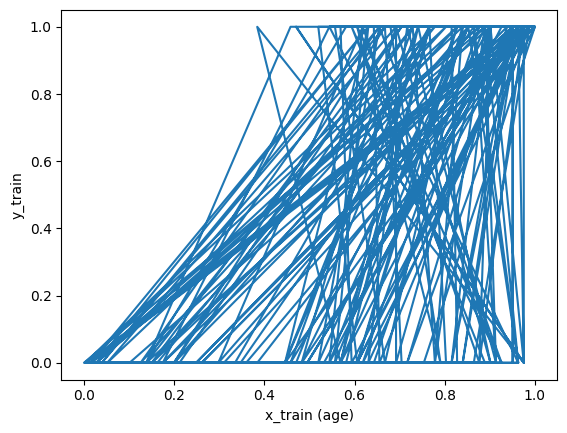

In [ ]:
x_train.shape, x_train
plt.plot(x_train[ 'age' ], y_train)
plt.xlabel('x_train (age)')
plt.ylabel('y_train (illness)')
plt.show()